In [1]:
import pybamm
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

from IPython.display import Audio
url = "https://proxy.notificationsounds.com/wake-up-tones/you-have-new-message-484/download/file-a1_ascendent-64kbps.mp3"
notify=Audio(url = url, autoplay = True)

########## pickle commands for dumping and retrieving data #######
# filename = 'dogs'
# outfile = open(filename,'wb')
# pickle.dump(dogs_dict,outfile)
# outfile.close()
# infile = open(filename,'rb')
# data = pickle.load(infile)
# infile.close()

########### parallel computations command ####################
# data = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in my_iterable)

In [2]:
# get experimental data
filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

temp_list = list(discharge_data.keys())


In [3]:
S8_initial_g = 2.6565990721396795
S6_initial_g = 0.03308746536461487
S4_initial_g = 0.013008078277994115
S2_initial_g = 2.8449317677625998e-08
S1_initial_g = 4.404388467562549e-12
Sp_initial_g = 2.6636551382083317e-06

# the total active material mass
m_s = S8_initial_g + S6_initial_g + S4_initial_g + S2_initial_g + S1_initial_g + Sp_initial_g

# get the mass fractions of the initial conditions
S8_initial_frac = S8_initial_g/m_s
S6_initial_frac = S6_initial_g/m_s
S4_initial_frac = S4_initial_g/m_s
S2_initial_frac = S2_initial_g/m_s
S1_initial_frac = S1_initial_g/m_s
Sp_initial_frac = Sp_initial_g/m_s

# set new total activate material mass to give Hunt's 0.211 Ah cell capacity
m_s_hunt = .168*1.3

# define the current for later simulations
current = 0.0211*2

# define discharge time in seconds for later simulations
hours = 10/2
time_in_seconds = 6330#hours*3600

S8_initial_hunt = S8_initial_frac*m_s_hunt*3
S6_initial_hunt = S6_initial_frac*m_s_hunt
S4_initial_hunt = S4_initial_frac*m_s_hunt
S2_initial_hunt = S2_initial_frac*m_s_hunt
S1_initial_hunt = S1_initial_frac*m_s_hunt
Sp_initial_hunt = Sp_initial_frac*m_s_hunt
V_initial_hunt = 2.4

# these are global variables to avoid needing to input them 
# we are not fitting initial conditions yet
discharge_initial_data = [V_initial_hunt, 
        S8_initial_hunt, 
        S6_initial_hunt,
        S4_initial_hunt, 
        S2_initial_hunt, 
        S1_initial_hunt, 
        Sp_initial_hunt]

model = pybamm.lithium_sulfur.Cornish_concentration_custom()

# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
current = 2*0.0211
hours = 15
time_in_seconds = 17300#hours*3600
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": discharge_initial_data[1],
        "Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": discharge_initial_data[3],
        "Initial Condition for S2 ion [g]": discharge_initial_data[4],
        "Initial Condition for S ion [g]": discharge_initial_data[5],
        "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[6],
        "Initial Condition for Terminal Voltage [V]": 2.4,#V_initial,
        #"Precipitation rate [s-1]": 50,
        "Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 1.9,
        "Standard Potential L [V]": 2.0,
        "Standard Potential M [V]": 2.0,
        "Standard Potential H [V]": 2.38,
        "gamma": 40,
        "kappa" : 10,
        #"Ambient Temperature [K]":302,
        #"S saturation mass [g]": 1e-3,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_cornish_discharge_base = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_cornish_discharge_base.solve(np.linspace(0, time_in_seconds, 10000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed


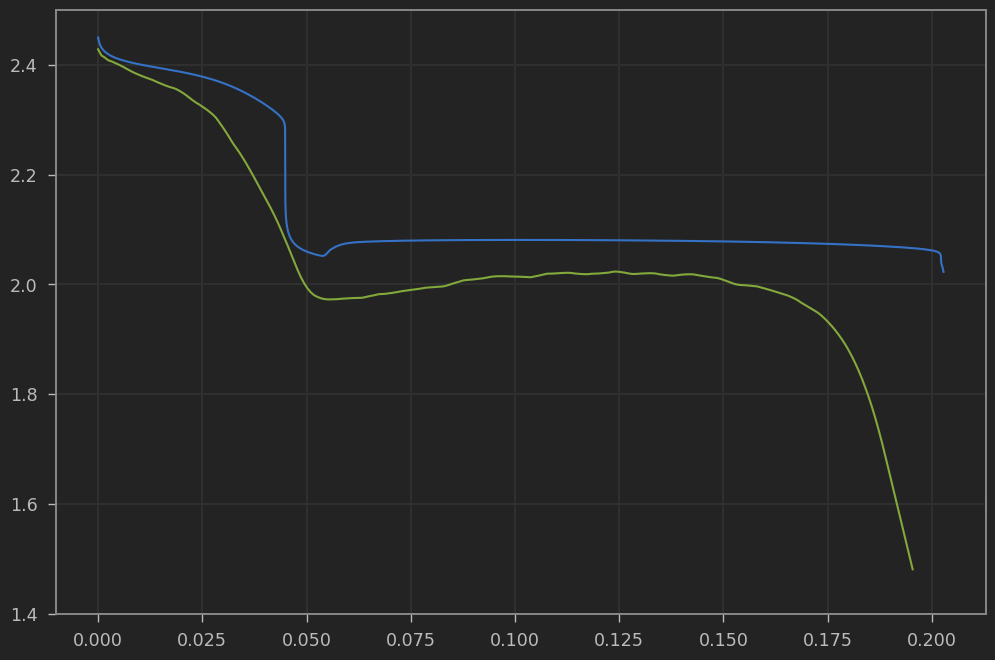

In [4]:
voltage_cornish_discharge_base = sim_cornish_discharge_base.solution['Terminal voltage [V]'].entries
capacity_cornish_discharge_base = abs(current)*sim_cornish_discharge_base.solution.t/3600
plt.plot(capacity_cornish_discharge_base,voltage_cornish_discharge_base)

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'])
plt.ylim([1.4,2.5])
plt.grid(True)
notify

In [5]:
temp_list = np.array([292.15,302.15,312.15])

gamma = 200
kappa = 30
data = {}

for temp in temp_list:

    key = str(temp)
    print('\n\n\n\n\n' + key + '\n\n\n\n\n')
    try:

        model = pybamm.lithium_sulfur.Cornish_concentration_custom()

        # (similar) parameters should be the same as in Marinescu et al. (2018)
        # However, the  initial condition from charge appears to be the result of a discharge
        current = 2*0.0211
        hours = 10
        time_in_seconds =hours*3600
        params = model.default_parameter_values
        params.update(
            {
                "Current function [A]": current,
                "Initial Condition for S8 ion [g]": discharge_initial_data[1],
                "Initial Condition for S6 ion [g]": discharge_initial_data[2],
                "Initial Condition for S4 ion [g]": discharge_initial_data[3],
                "Initial Condition for S2 ion [g]": discharge_initial_data[4],
                "Initial Condition for S ion [g]": discharge_initial_data[5],
                "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[6],
                "Initial Condition for Terminal Voltage [V]": 2.4,#V_initial,
                "Precipitation rate [s-1]": 500,
                "Shuttle rate coefficient during discharge [s-1]": 0.0001,
                "Lower voltage cut-off [V]": 1.9,
                "Standard Potential L [V]": 2.0,
                "Standard Potential M [V]": 2.0,
                "Standard Potential H [V]": 2.38,
                "gamma": gamma,
                "kappa" : kappa,
                "Ambient Temperature [K]":temp,
                #"S saturation mass [g]": sat,
                #"Electrolyte volume per cell [L]": 0.0114*.25
            }
        )
        params.process_model(model)
        sim_cornish_discharge_base = pybamm.Simulation(
            model,
            parameter_values=params,
            solver=pybamm.CasadiSolver(
                atol=1e-6, 
                rtol=1e-3, 
                extra_options_setup={"max_step_size": 0.1}, 
                max_step_decrease_count = 15,
                #root_method = 'lm',
                #root_tol = 1e-7, 
                #dt_max = 1e-7
            ),
        )
        sim_cornish_discharge_base.solve(np.linspace(0, time_in_seconds, 100))
        
        data[key] = sim_cornish_discharge_base
    except:
        print("\n\n\n\n\n Failure! \n\n\n\n\n")






292.15







psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.0332069 and

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c






302.15







psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.0229428 and

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c






312.15







psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0.0139546 and

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

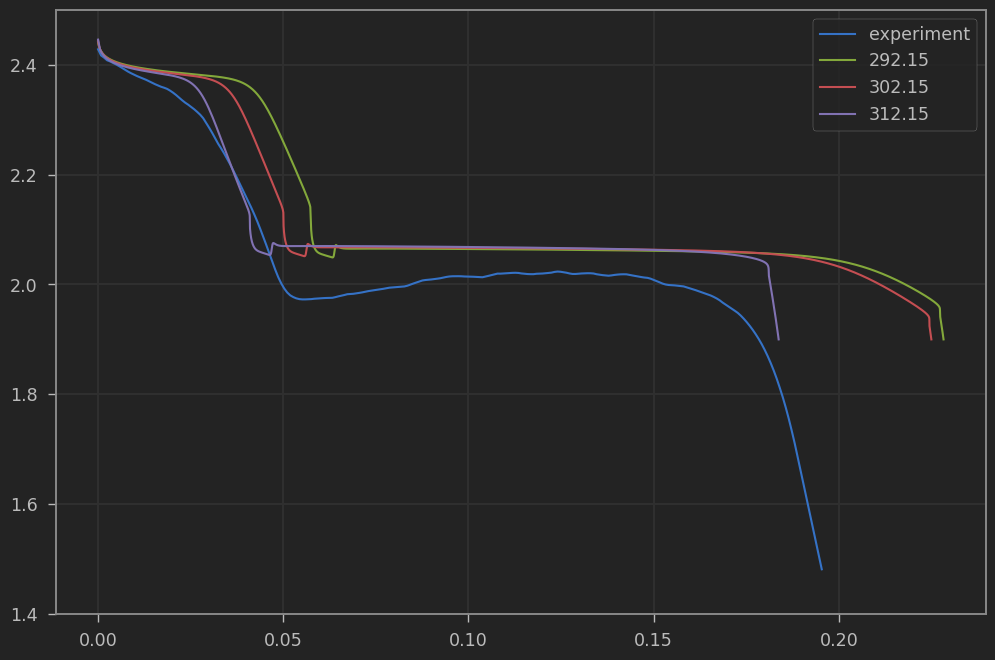

In [6]:

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'])
legend = ['experiment']
for key in data.keys():
    sim = data[key]
    voltage = sim.solution['Terminal voltage [V]'].entries
    capacity = abs(current)*sim.solution.t/3600

    plt.plot(capacity,voltage)
    legend.append(key)
plt.legend(legend)
plt.ylim([1.4,2.5])
plt.grid(True)
notify 

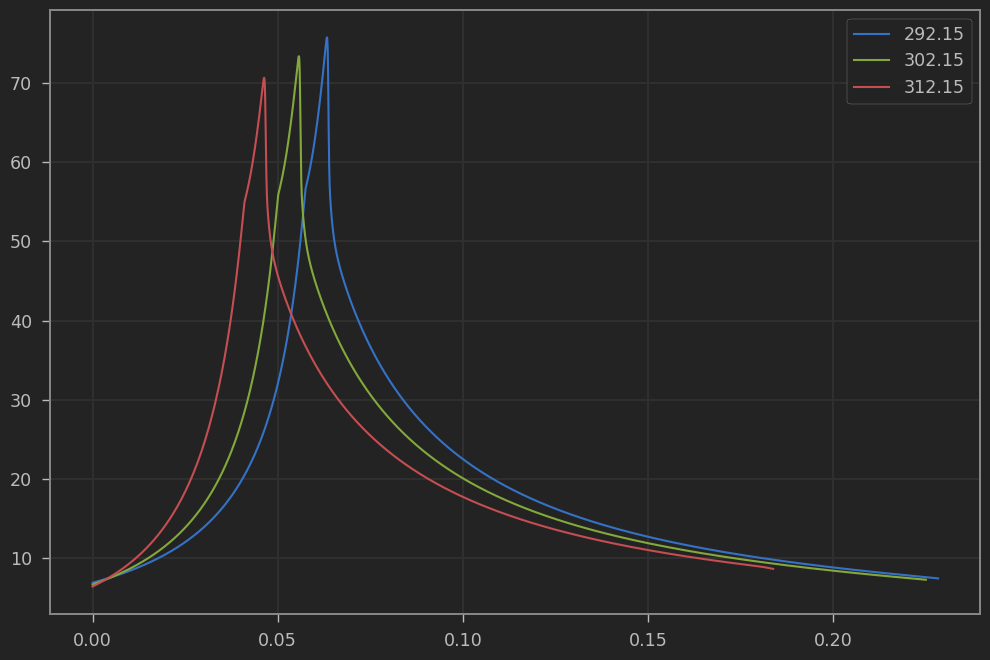

In [7]:
legend = []
for key in data.keys():
    sim = data[key]
    S6 = sim.solution['S6 [g]'].entries
    S4 = sim.solution['S4 [g]'].entries
    S2 = sim.solution['S2 [g]'].entries
    S1 = sim.solution['S [g]'].entries
    Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
    R = 1/(max(Li)*1.1 - Li)
    capacity = abs(current)*sim.solution.t/3600

    plt.plot(capacity,R)
    legend.append(key)
plt.legend(legend)

plt.grid(True)
notify 

In [24]:
temp_list = np.array([292.15,302.15,312.15])

gamma = 500
kappa = 30
data_charge = {}

for temp in temp_list:

    key = str(temp)
    print('\n\n\n\n\n' + key + '\n\n\n\n\n')
    
    
    try:
        # get initial condition
        sim = data[key]
        loc = -1
        S8_initial = sim.solution['S8 [g]'].entries[loc]
        S6_initial = sim.solution['S6 [g]'].entries[loc]
        S4_initial = sim.solution['S4 [g]'].entries[loc]
        S2_initial = sim.solution['S2 [g]'].entries[loc]
        S1_initial = sim.solution['S [g]'].entries[loc]
        Sp_initial = sim.solution['Precipitated Sulfur [g]'].entries[loc]
        V_initial = sim.solution['Terminal voltage [V]'].entries[loc]
        print(V_initial)
        print(S8_initial)
        print(S6_initial)
        print(S4_initial)
        print(S2_initial)
        print(S1_initial)
        print(Sp_initial)
        model = pybamm.lithium_sulfur.Cornish_concentration_custom()

        # (similar) parameters should be the same as in Marinescu et al. (2018)
        # However, the  initial condition from charge appears to be the result of a discharge
        current = -0.0211
        hours = 15
        time_in_seconds =300#hours*3600
        params = model.default_parameter_values
        params.update(
            {
                "Current function [A]": current,
                "Initial Condition for S8 ion [g]": S8_initial,
                "Initial Condition for S6 ion [g]": S6_initial,
                "Initial Condition for S4 ion [g]": S4_initial,
                "Initial Condition for S2 ion [g]": S2_initial,
                "Initial Condition for S ion [g]": S1_initial,
                "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
                "Initial Condition for Terminal Voltage [V]": V_initial,
                "Precipitation rate [s-1]": 500,
                "Shuttle rate coefficient during discharge [s-1]": 0.0001,
                "Lower voltage cut-off [V]": 1.8,
                "Standard Potential L [V]": 2.0,
                "Standard Potential M [V]": 2.0,
                "Standard Potential H [V]": 2.38,
                "gamma": 0*gamma,
                "kappa" : 0*kappa,
                "Ambient Temperature [K]":temp,
                #"S saturation mass [g]": sat,
                #"Electrolyte volume per cell [L]": 0.0114*.25
            }
        )
        params.process_model(model)
        sim_cornish_charge_base = pybamm.Simulation(
            model,
            parameter_values=params,
            solver=pybamm.CasadiSolver(
                atol=1e-6, 
                rtol=1e-3, 
                extra_options_setup={"max_step_size": 0.1}, 
                max_step_decrease_count = 15,
                #root_method = 'lm',
                #root_tol = 1e-7, 
                #dt_max = 1e-7
            ),
        )
        sim_cornish_charge_base.solve(np.linspace(0, time_in_seconds, 100))
        
        data_charge[key] = sim_cornish_charge_base
    except:
        print("\n\n\n\n\n Failure! \n\n\n\n\n")






292.15





1.9000000090699525
6.8158412589688205e-74
0.06181022485514752
3.423801528097836e-22
0.001983410292022305
0.00010438819128077695
0.2908820841910739


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c






302.15





1.9000000084507425
2.2365672747091648e-91
1.432210223487768e-21
0.047467855406384055
0.0021392841068844006
0.00010428484742529703
0.2978974984444469


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed







312.15





1.900000029160532
2.1232529265335104e-89
1.3059950869760746e-21
0.1566827461305836
0.002300686189946048
0.00010525014060140499
0.2431276857061091


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 3.05455 and h

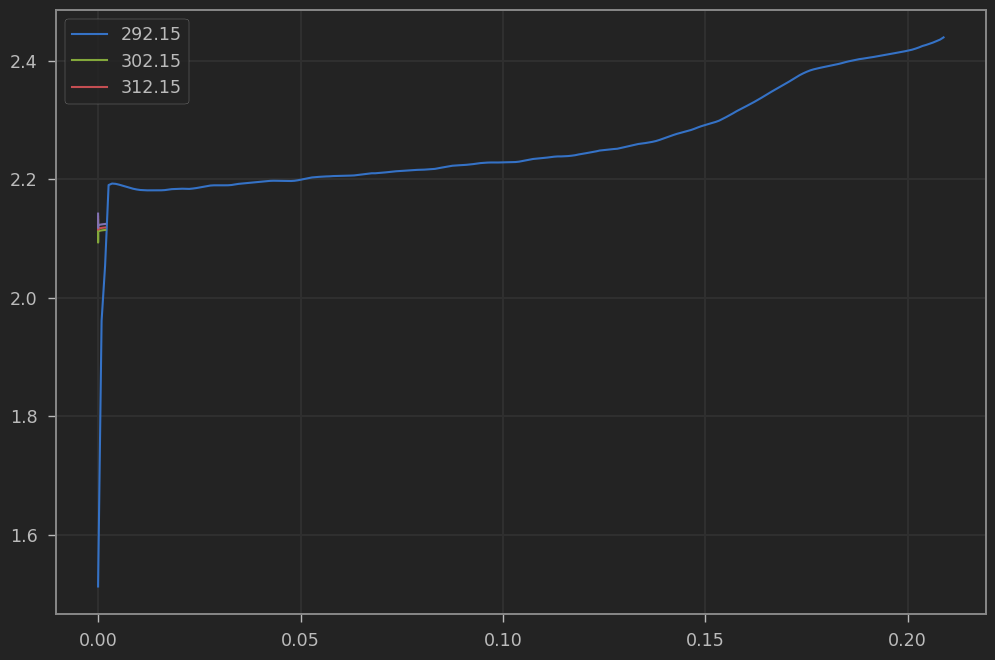

In [25]:
plt.plot(charge_data['30']['capacity'],charge_data['30']['internal voltage'])
legend = ['experiment']
legend = []
for key in data_charge.keys():
    sim = data_charge[key]
    voltage = sim.solution['Terminal voltage [V]'].entries
    capacity = abs(current)*sim.solution.t/3600

    plt.plot(capacity,voltage)
    legend.append(key)
plt.legend(legend)
#plt.ylim([1.4,2.5])
plt.grid(True)
notify 

In [85]:
temp_list = np.array([292.15,302.15,312.15])

gamma = 500
kappa = 30
data_charge2 = {}

for temp in temp_list:

    key = str(temp)
    print('\n\n\n\n\n' + key + '\n\n\n\n\n')
    
    
    try:
        # get initial condition
        sim = data_charge[key]
        loc = -1
        S8_initial = sim.solution['S8 [g]'].entries[loc]
        S6_initial = sim.solution['S6 [g]'].entries[loc]
        S4_initial = sim.solution['S4 [g]'].entries[loc]
        S2_initial = sim.solution['S2 [g]'].entries[loc]
        S1_initial = sim.solution['S [g]'].entries[loc]
        Sp_initial = sim.solution['Precipitated Sulfur [g]'].entries[loc]
        V_initial = sim.solution['Terminal voltage [V]'].entries[loc]
        print(V_initial)
        print(S8_initial)
        print(S6_initial)
        print(S4_initial)
        print(S2_initial)
        print(S1_initial)
        print(Sp_initial)
        model = pybamm.lithium_sulfur.Cornish_concentration_custom()

        # (similar) parameters should be the same as in Marinescu et al. (2018)
        # However, the  initial condition from charge appears to be the result of a discharge
        current = -0.0211
        hours = 15
        time_in_seconds =29500#hours*3600
        params = model.default_parameter_values
        params.update(
            {
                "Current function [A]": current,
                "Initial Condition for S8 ion [g]": S8_initial,
                "Initial Condition for S6 ion [g]": S6_initial,
                "Initial Condition for S4 ion [g]": S4_initial,
                "Initial Condition for S2 ion [g]": S2_initial,
                "Initial Condition for S ion [g]": S1_initial,
                "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
                "Initial Condition for Terminal Voltage [V]": 2.0,#V_initial,
                "Precipitation rate [s-1]": 500,
                "Shuttle rate coefficient during discharge [s-1]": 0.0001,
                "Lower voltage cut-off [V]": 1.8,
                "Standard Potential L [V]": 2.0,
                "Standard Potential M [V]": 2.0,
                "Standard Potential H [V]": 2.38,
                "gamma": 130,
                "kappa" : 40,
                "Ambient Temperature [K]":temp,
                #"S saturation mass [g]": sat,
                #"Electrolyte volume per cell [L]": 0.0114*.25
            }
        )
        params.process_model(model)
        sim_cornish_charge_base = pybamm.Simulation(
            model,
            parameter_values=params,
            solver=pybamm.CasadiSolver(
                atol=1e-6, 
                rtol=1e-3, 
                extra_options_setup={"max_step_size": 0.1}, 
                max_step_decrease_count = 15,
                #root_method = 'lm',
                #root_tol = 1e-7, 
                #dt_max = 1e-7
            ),
        )
        sim_cornish_charge_base.solve(np.linspace(0, time_in_seconds, 100))
        
        data_charge2[key] = sim_cornish_charge_base
    except:
        print("\n\n\n\n\n Failure! \n\n\n\n\n")






292.15





2.1142447162210125
1.1344670672285964e-32
0.06671264337410837
0.003268279012359547
0.0004626949444567092
9.841212615845606e-05
0.2883234268386635





 Failure! 










302.15





2.118407077846567
2.1271709893994138e-32
0.005027964218530609
0.05081983155245711
0.00047209877349933767
9.84501421306288e-05
0.2953805483000582


Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
Newton/Linesearch algorithm failed to converge.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Ja

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 297.98 and h 






 Failure! 










312.15





2.1243406928707205
1.7893747743718654e-30
0.005104281403789781
0.16008560039984365
0.0005444641418136818
9.809686980120038e-05
0.2406374931883717


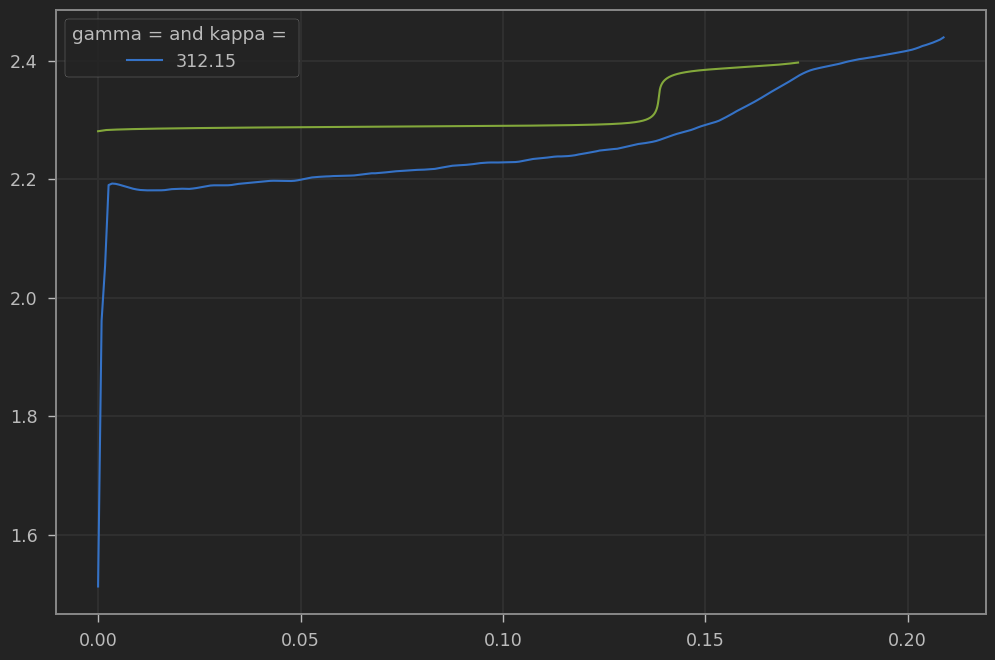

In [86]:
plt.plot(charge_data['30']['capacity'],charge_data['30']['internal voltage'])
legend = ['experiment']
legend = []
for key in data_charge2.keys():
    sim = data_charge2[key]
    voltage = sim.solution['Terminal voltage [V]'].entries
    capacity = abs(current)*sim.solution.t/3600

    plt.plot(capacity,voltage)
    legend.append(key)
plt.legend(legend, title = "gamma = and kappa = ")
#plt.ylim([1.4,2.5])
plt.grid(True)
notify 